<a href="https://colab.research.google.com/github/DaanMoura/AprendizadoDeMaquina/blob/main/trabalho2/AM_Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U scikit-learn

     |████████████████████████████████| 22.2MB 65.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.morphology import skeletonize
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import mixture
import secrets

#THE MNIST DATABASE of handwritten digits

Este dataset é formado por 70.000 imagens de digitos escritos a mão. 60.000 delas contêm labels. Os labels poderiam ser retirados dos dados, porém como o conjunto de testes possui uma melhor distribuição em relação ao grupos, ele foi utilizado para treinar os modelos e não o dataset inteiro. O método GMM também foi treinado utilizando uma porção menor de exemplos, devido sua eficiência

In [ ]:

!rm *.zip*
!wget "https://github.com/DaanMoura/AprendizadoDeMaquina/blob/main/train.csv.zip?raw=true" -o numbers.zip
!echo -e "y" | unzip 'train.csv.zip?raw=true'
!ls

Archive:  train.csv.zip?raw=true
  inflating: train.csv               
 numbers.csv   numbers.zip   sample_data   train.csv  'train.csv.zip?raw=true'


In [ ]:
!ls -ltr

total 209272
-rw-r--r-- 1 root root  76775041 Dec 11  2019  train.csv
drwxr-xr-x 1 root root      4096 Jan  6 18:10  sample_data
-rw-r--r-- 1 root root 127886390 Jan 10 15:58  numbers.csv
-rw-r--r-- 1 root root   9606023 Jan 15 03:48 'train.csv.zip?raw=true'
-rw-r--r-- 1 root root     15515 Jan 15 03:48  numbers.zip


#Pré-processamento dos dados

In [ ]:
numbers_df = pd.read_csv('train.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc117d72400>]],
      dtype=object)

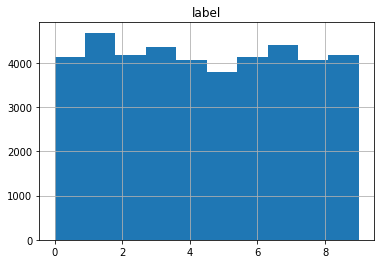

In [ ]:
numbers_df.hist('label')

In [ ]:
numbers_df.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels = numbers_df['label']
labels_true = labels.to_numpy()

In [ ]:
numbers_df.drop(['label'], axis=1, inplace=True)

In [ ]:
numbers_df['pixel783'] = 0
numbers = numbers_df.to_numpy()
length = len(numbers)

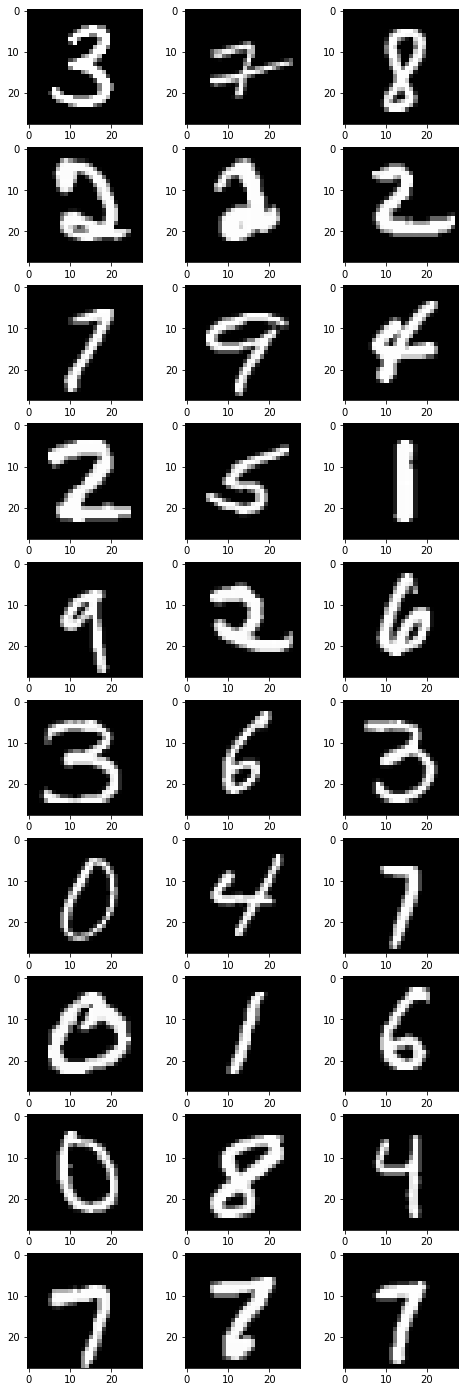

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(numbers[secrets.choice(list(range(LENGTH)))].reshape(28,28), cmap = 'gray')

#Função para transformar imagens em binario

In [ ]:
def to_binary(image):
  out = image.copy()
  for i in range(len(image)):
    if (image[i] > 30):
        out[i] = 1
    else:
        out[i] = 0
  return out
      

# Plot numbers

In [ ]:
def plot_numbers(images, r):
  plt.figure(figsize=[25, 25])
  for i in range (1, 11):
    for j in range (1, 7):
      plt.subplot(10, 9, (i-1)* 9 + j) 
      plt.imshow(images[i-1][secrets.choice(list(range(r)))].reshape(28,28), cmap = 'gray')

#Kmeans utilizando o dataset normal

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(numbers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
adjusted_rand_score(labels_true,kmeans.labels_)

0.3616937931531382

In [ ]:
numbers_labeled = {}
for i in range (0, 10):
  numbers_labeled[i] = []
for i in range(0, length):
  numbers_labeled[kmeans_bin.labels_[i]].append(numbers[i])

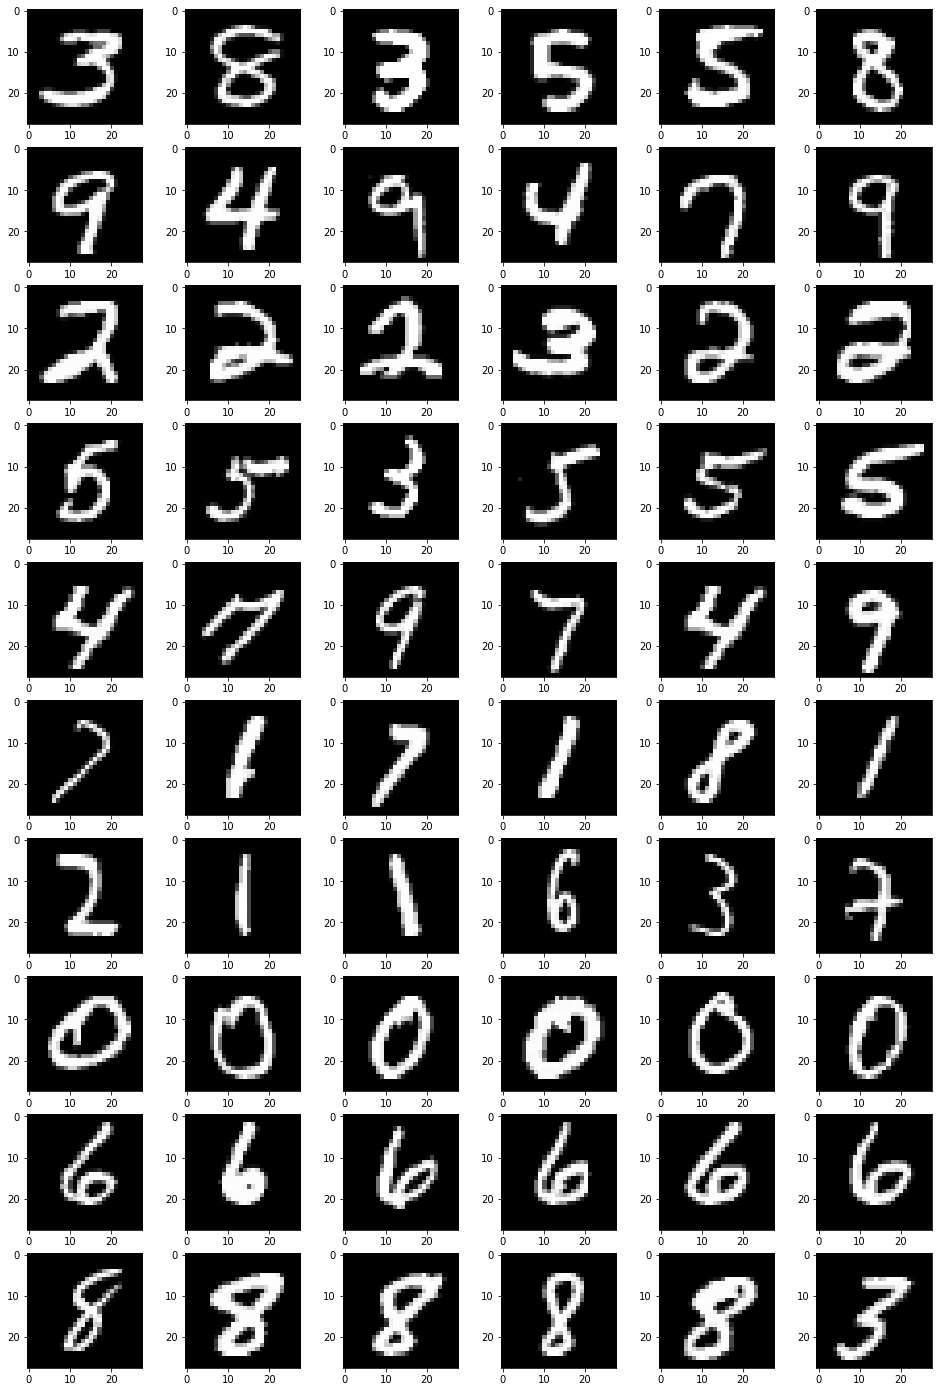

In [ ]:
plot_numbers(numbers_labeled, 500)

#Kmeans utilizando o dataset com imagens transformadas em binario

In [ ]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = to_binary(numbers[i]).reshape(28,28).reshape(784)

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000


In [ ]:
reduced_data_bin = bin_numbers
kmeans_bin = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans_bin.fit(reduced_data_bin)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
#bin
x_bin = []
y_bin = []
for i in kmeans_bin.cluster_centers_:
  x_bin.append(i[0])
  y_bin.append(i[1])
k_bin = {}
z_bin = {}
numbers_labeled_bin = {}
for i in range (0, 10):
  k_bin[i] = []
  z_bin[i] = []
  numbers_labeled_bin[i] = []
for i in range(0, length):
  
  numbers_labeled_bin[kmeans_bin.labels_[i]].append(bin_numbers[i])
  k_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][0])
  z_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][1])

In [ ]:
adjusted_rand_score(labels_true,kmeans_bin.labels_)

0.3826721693072571

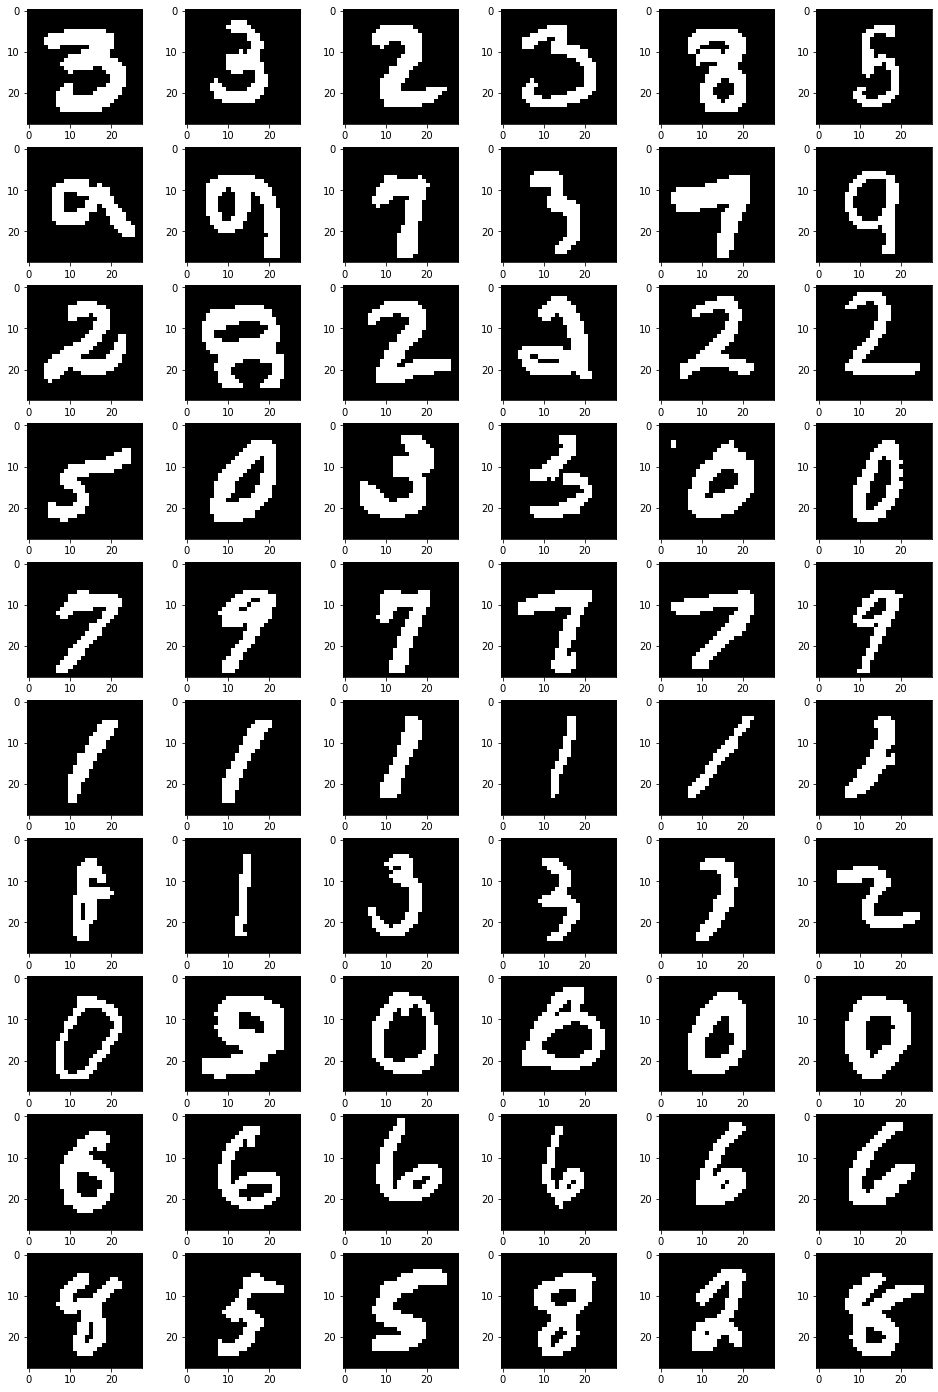

In [ ]:
plot_numbers(numbers_labeled_bin, 500)

#Kmeans utilizando dataset com imagens esqueletizadas

In [ ]:
bin_numbers_esk = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers_esk[i] = skeletonize(to_binary(numbers[i]).reshape(28,28)).reshape(784)

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000


In [ ]:
kmeans_bin_esk = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans_bin_esk.fit(bin_numbers_esk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
x_bin_esk = []
y_bin_esk = []
for i in kmeans_bin_esk.cluster_centers_:
  x_bin_esk.append(i[0])
  y_bin_esk.append(i[1])
k_bin_esk = {}
z_bin_esk = {}
numbers_labeled_bin_esk = {}
for i in range (0, 10):
  k_bin_esk[i] = []
  z_bin_esk[i] = []
  numbers_labeled_bin_esk[i] = []
for i in range(0, length):
  
  numbers_labeled_bin_esk[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i])
  k_bin[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i][0])
  z_bin[kmeans_bin_esk.labels_[i]].append(bin_numbers_esk[i][1])

In [ ]:
adjusted_rand_score(labels_true,kmeans_bin_esk.labels_)

0.2855646758702001

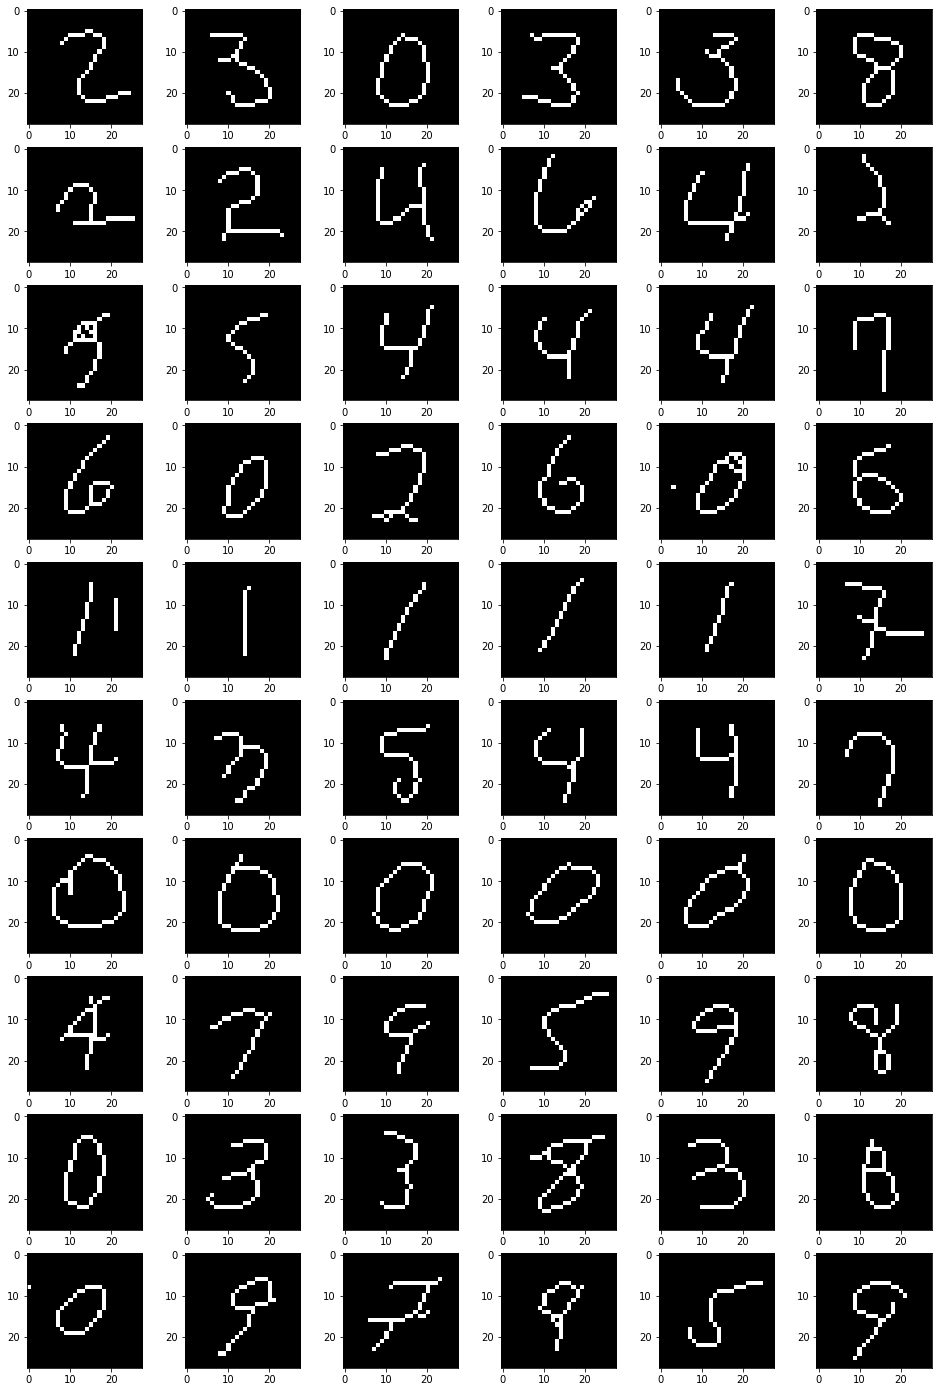

In [ ]:
plot_numbers(numbers_labeled_bin_esk, 500)

#Kmeans utilizando dataset normal com o uso do PCA

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(numbers)
print(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

[[-661.59426653 -699.31171113]
 [1701.45242547 -360.55166121]
 [-886.89921581 -293.7671945 ]
 ...
 [ 336.26712791  950.01026791]
 [ 327.40523236   62.01640547]
 [-364.23784043  418.88913884]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])
k = {}
z = {}
numbers_labeled = {}
for i in range (0, 10):
  k[i] = []
  z[i] = []
  numbers_labeled[i] = []
for i in range(0, length):
  numbers_labeled[kmeans.labels_[i]].append(numbers[i])
  k[kmeans.labels_[i]].append(reduced_data[i][0])
  z[kmeans.labels_[i]].append(reduced_data[i][1])


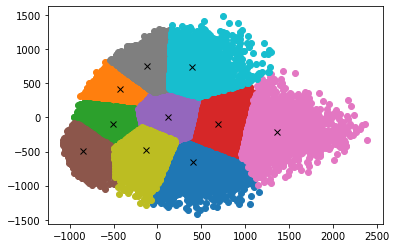

In [ ]:
for i in range (0,10):
  plt.plot(k[i],z[i],'o')
plt.plot(x,y,'x', color = 'black') 

In [ ]:
adjusted_rand_score(labels_true,kmeans.labels_)

0.23211836567069846

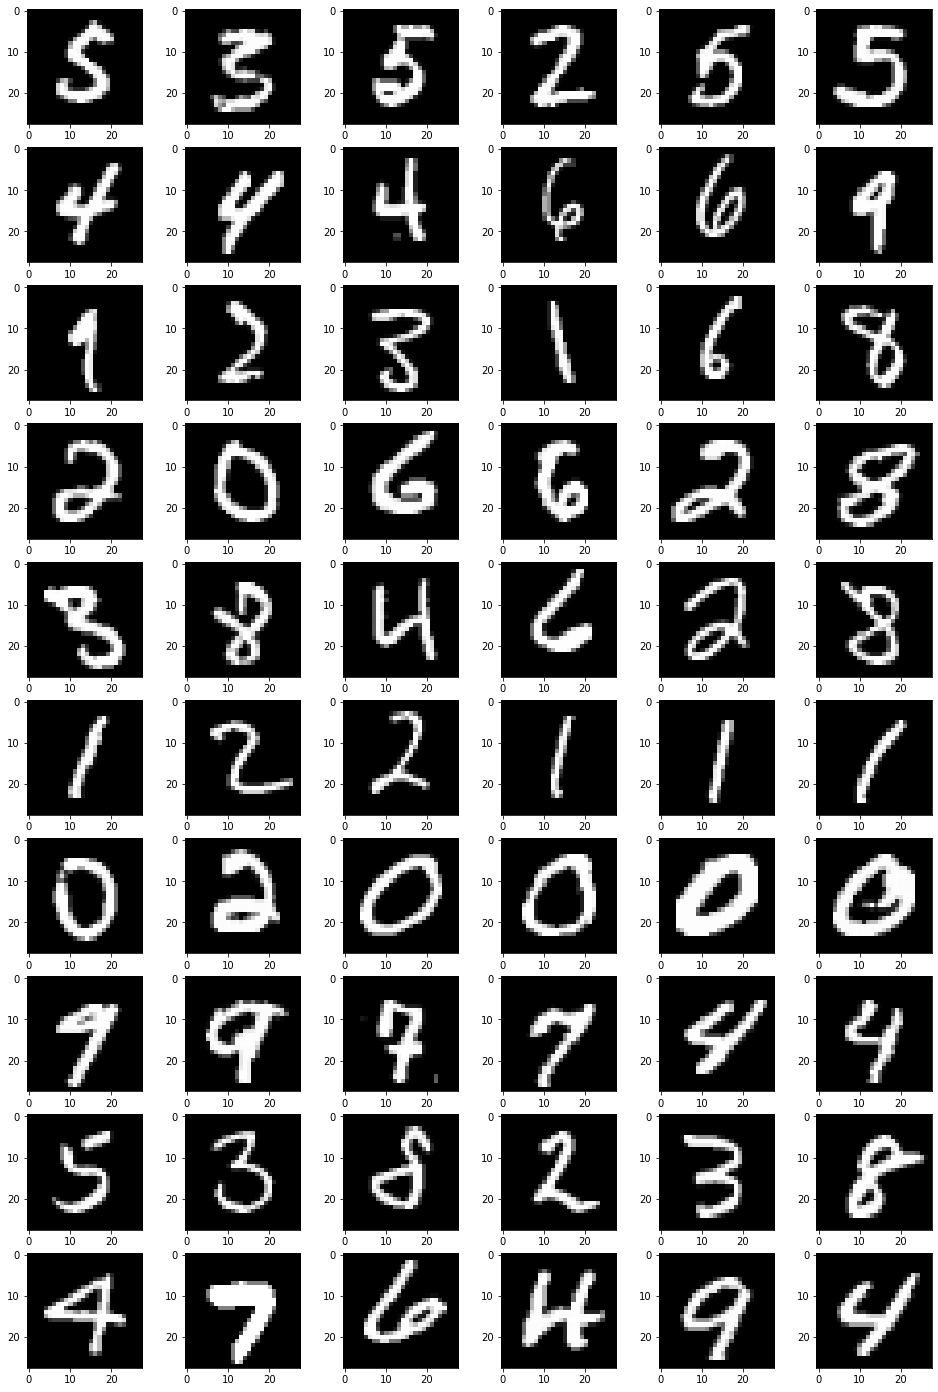

In [ ]:
plot_numbers(numbers_labeled, 500)

# Kmeans com menos dados

In [ ]:
reduced_numbers = numbers[:2000]

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_numbers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
adjusted_rand_score(labels_true[:2000],kmeans.labels_)

0.36581744815656075

#GMM utilizando o dataset normal



In [ ]:
reduced_numbers = numbers[:10000]

In [ ]:
gmm = mixture.GaussianMixture(n_components=10)
gmm_labels = gmm.fit_predict(reduced_numbers)

In [ ]:
reduced_numbers_labeled = {}
for i in range (0, 10):
  reduced_numbers_labeled[i] = []
for i in range(0, 10000):
  reduced_numbers_labeled[gmm_labels[i]].append(bin_numbers[i])

In [ ]:
gmm_labels

array([7, 8, 1, ..., 4, 6, 6])

In [ ]:
adjusted_rand_score(labels_true[:10000],gmm_labels)

0.21966058620531242

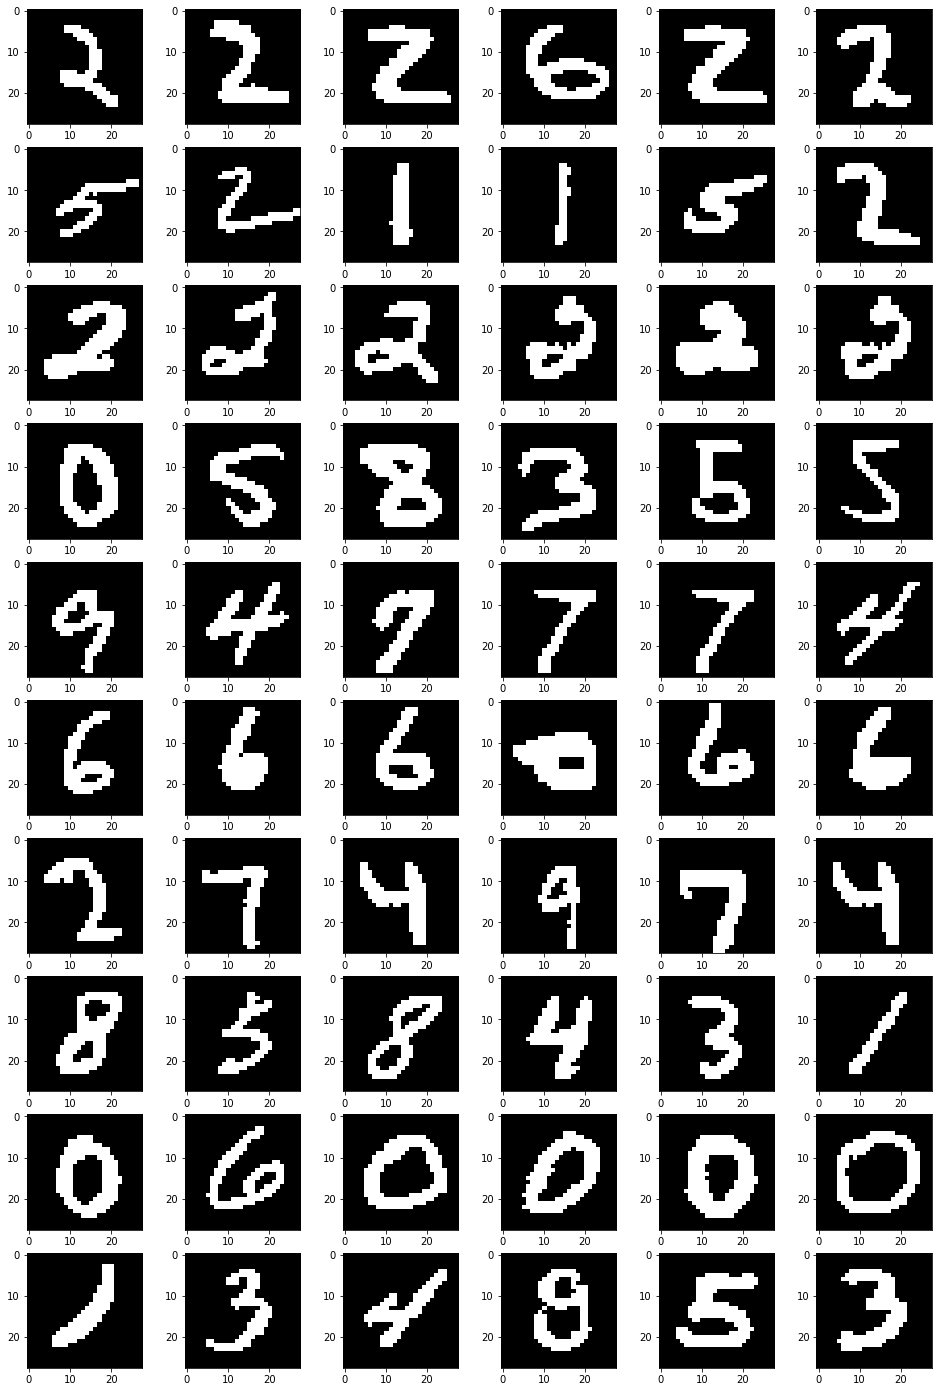

In [ ]:
plot_numbers(reduced_numbers_labeled, 200)

In [ ]:
reduced_numbers = numbers[:2000]

In [ ]:
gmm = mixture.GaussianMixture(n_components=10)
gmm_labels = gmm.fit_predict(reduced_numbers)

In [ ]:
reduced_numbers_labeled = {}
for i in range (0, 10):
  reduced_numbers_labeled[i] = []
for i in range(0, 2000):
  reduced_numbers_labeled[gmm_labels[i]].append(bin_numbers[i])

In [ ]:
adjusted_rand_score(labels_true[:2000],gmm_labels)

0.3750795269747515

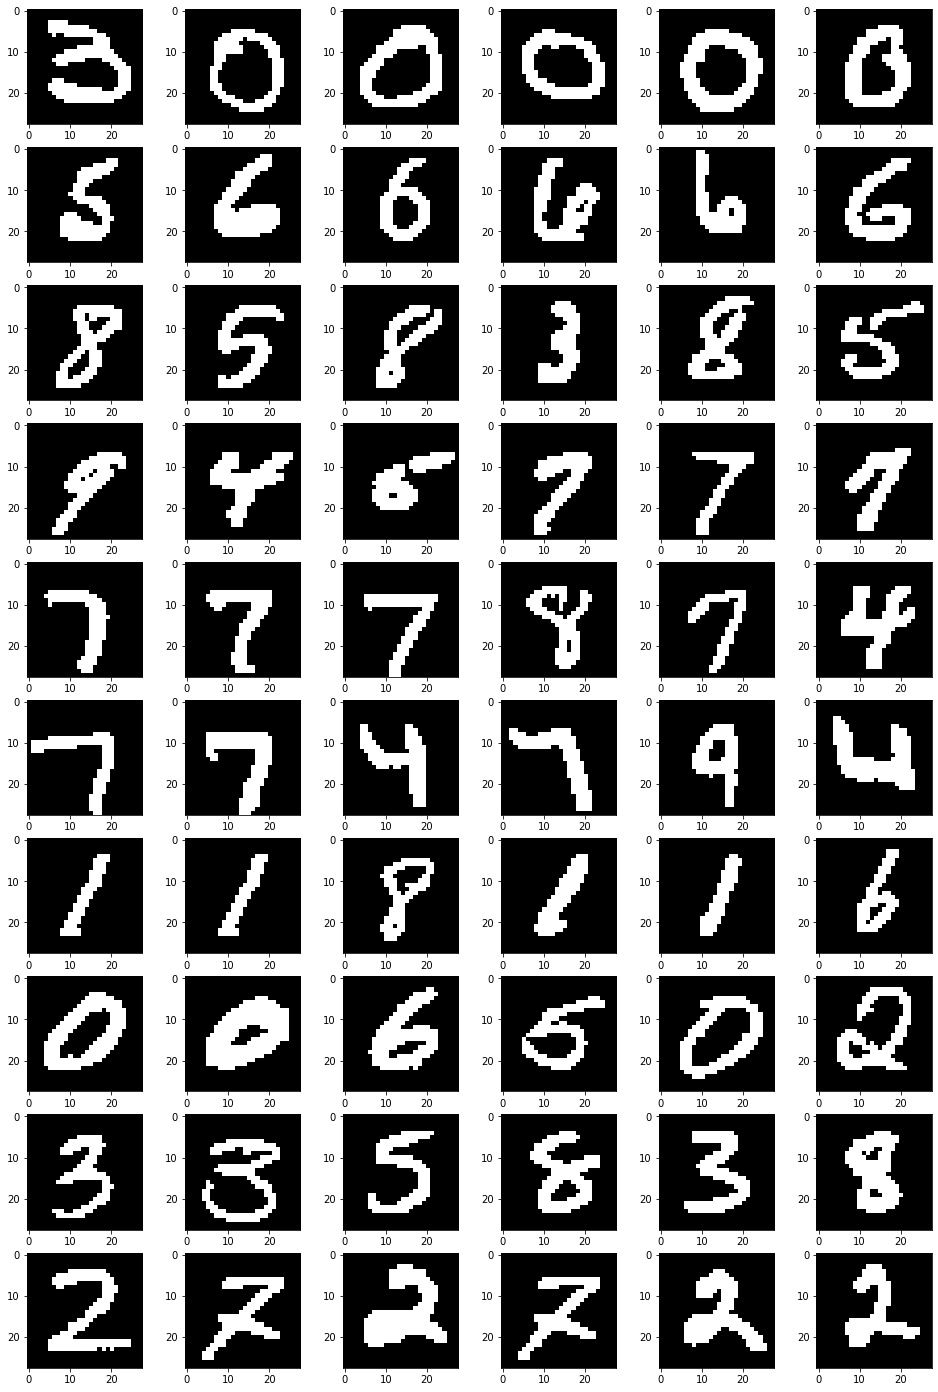

In [ ]:
plot_numbers(reduced_numbers_labeled, 100)